In [7]:
# Imports for the excercise
import pandas as pd 
import logging
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from arcus.ml.evaluation import classification as clev    

## Initial model evaluation of a basic Logic Regression classifier

1. Loading of a dataset
1. Fitting simple Logistic Regression classifier

In [8]:
df = pd.read_csv('../tests/resources/datasets/student-admission.csv')
y = df.Admission.values
X = np.asarray(df.drop(['Admission'],axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# trainen van de logistic regression classifier
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, solver='liblinear')

### Visualization of model evaluation, without Roc curve

In [9]:
_ = clev.evaluate_model(logreg, X_test, y_test)

precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.79      0.88        19

    accuracy                           0.87        30
   macro avg       0.87      0.89      0.86        30
weighted avg       0.90      0.87      0.87        30

[[11  0]
 [ 4 15]]
Accuracy score: 86.66666666666667


### Adding the ROC curve

precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.79      0.88        19

    accuracy                           0.87        30
   macro avg       0.87      0.89      0.86        30
weighted avg       0.90      0.87      0.87        30

[[11  0]
 [ 4 15]]
Accuracy score: 86.66666666666667


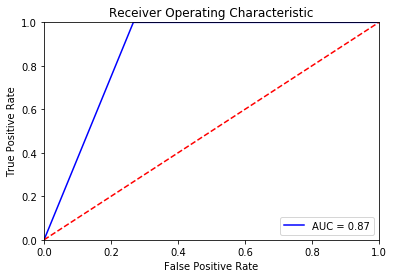

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1])

In [10]:
clev.evaluate_model(logreg, X_test, y_test, show_roc=True)

In [11]:
df = pd.read_csv('../tests/resources/datasets/wine-makers.csv')
y = df.Cultivar.values
X = df.drop(['Cultivar'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

    # trainen van de logistic regression classifier
logreg = linear_model.LogisticRegression(C=1,solver='lbfgs')
logreg.fit(X_train, y_train)

_ = clev.evaluate_model(logreg, X_test, y_test, False)

precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.89      0.94      0.91        17
           2       0.95      1.00      0.97        18

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

[[17  2  0]
 [ 0 16  1]
 [ 0  0 18]]
Accuracy score: 94.44444444444444


In [12]:
#np.array(map(str, np.array(sorted(np.unique(y_test)))))
np.char.mod('%d', sorted(np.unique(y_train)))

array(['0', '1', '2'], dtype='<U1')